# Week 12 - Word vector visualization with Gensim

📚 Source: 😊[Day 12 - Special Data Types: Natural Language Processing](https://github.com/core-skills/12-text-processing) *repository*

## Notebook Overview
In this notebook we will explore word vectors. To achieve this we will use the [Gensim](https://radimrehurek.com/gensim/) library with pretrained [GloVe vectors](https://nlp.stanford.edu/projects/glove/). Gensim allows us to convert a file of GloVe vectors into word2vec format. The 100d GloVe embeddings are used within the notebook, however there are various dimensions such as 50 and 300.

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/06062705/Word-Vectors.png" alt="" style="width:800px;"/>

[analyticsvidhya](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/06062705/Word-Vectors.png) 

**Supplementary Content**:
- Check out https://rare-technologies.com/word2vec-tutorial/ for an interactive web-based application that allows you to do play with different functionalties of word embeddings.

Adapted from: *CS224n: Natural Language Processing with Deep Learning*

# Table of Contents
1. [Word Vectors](#word_vectors)
2. [Word Similarities](#word_similarities)
3. [Word Analogies](#word_analogies)
4. [Visualising Word Vectors](#vector_visualisation)

### Notebook Setup

In [5]:
%%capture
!pip install numpy matplotlib gensim==4.2.0 sklearn nb_black

<IPython.core.display.Javascript object>

Lets load in the package [nb_black](https://github.com/dnanhkhoa/nb_black) to auto-format our code as we go. Formatting code is useful as it easier to collaborate and interpret what we write.

In [6]:
# Package for ensuring code we write is formatted nicely (see: https://github.com/dnanhkhoa/nb_black)
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

### Import Packages
Standard packages

In [7]:
import pprint
from typing import List
from pathlib import Path

<IPython.core.display.Javascript object>

Third Party packages
- [numpy](https://numpy.org/) - library that we will use for helping visualise word vectors
- [matplotlib](https://matplotlib.org/) - library that we will use for plotting the data
- [gensim](https://radimrehurek.com/gensim/) - library that we will use to experiment with word embeddings/vectors
- [sklearn](https://scikit-learn.org/) - library that we will use for performing dimensionality reduction to help visualise word vectors

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import gensim.downloader
from sklearn.decomposition import PCA

<IPython.core.display.Javascript object>

### Notebook configuration and helper functions setup

In [9]:
# Makes printing lists prettier 
pp = pprint.PrettyPrinter(indent=2)

<IPython.core.display.Javascript object>

In [10]:
# Get the interactive Tools for Matplotlib
%matplotlib inline
plt.style.use('ggplot')

<IPython.core.display.Javascript object>

In [11]:
def prettify_similarities(similarities: List[tuple]) -> List[str]:
    ''' Prettifies list of word similarities produced by Gensim.'''
    longest_str = max([len(sim[0]) for sim in similarities])
    return "\n".join([f'{idx+1}.\t{sim[0]:{longest_str+1}}\t{sim[1]*100:0.1f}%' for idx, sim in enumerate(similarities)])

<IPython.core.display.Javascript object>

### Load pretrained word embeddings from Gensim API

In [12]:
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


<IPython.core.display.Javascript object>

In [13]:
w2v_glove_vectors = gensim.downloader.load('glove-wiki-gigaword-50')

<IPython.core.display.Javascript object>

## Word Vectors <a name="word_vectors"></a>
Now that we have loaded the pre-trained word embedding model, let's unpack it. 

In [14]:
test_word = 'perth'

<IPython.core.display.Javascript object>

In [15]:
# Numerical representation words
# Note: if we add words that are out-of-vocabulary (e.g. not in the corpus the model was trained on, we'll receive an error)
w2v_glove_vectors[test_word]

array([-0.41113 ,  0.46758 , -1.0384  ,  0.40354 , -0.73767 , -0.43019 ,
       -0.48273 ,  0.76254 ,  0.37496 , -0.59497 ,  0.32855 , -0.51957 ,
        0.12317 , -0.84902 , -0.34538 ,  0.91241 ,  0.094925,  0.59725 ,
       -1.9156  ,  0.68658 ,  0.85823 ,  0.72012 , -0.039988,  0.83465 ,
       -0.15089 , -0.49574 ,  0.43055 ,  0.39034 , -0.7828  , -0.19121 ,
        0.87594 ,  0.32468 ,  0.83548 , -0.74807 ,  0.90122 , -0.1735  ,
        0.7837  , -0.28646 , -0.16151 , -0.51013 , -0.14672 , -0.36352 ,
       -0.13938 , -0.28603 , -0.55565 ,  1.2286  , -0.35194 , -0.39647 ,
        0.43255 , -0.67224 ], dtype=float32)

<IPython.core.display.Javascript object>

In [16]:
# Checking out the shape of the embeddings that are produced for a given word
w2v_glove_vectors[test_word].shape

(50,)

<IPython.core.display.Javascript object>

## Word Similarities<a name="word_similarities"></a>

Using the pre-trained word vectors, we can perform simple distance operations such as finding similar words e.g. finding those that are the closest in vector space

In [17]:
print(prettify_similarities(w2v_glove_vectors.most_similar('obama')))

1.	barack  	96.7%
2.	bush    	96.4%
3.	clinton 	96.1%
4.	mccain  	91.2%
5.	dole    	88.8%
6.	gore    	88.5%
7.	hillary 	87.8%
8.	rodham  	84.0%
9.	kerry   	82.6%
10.	biden   	81.0%


<IPython.core.display.Javascript object>

In [18]:
print(prettify_similarities(w2v_glove_vectors.most_similar('gold')))

1.	silver   	95.0%
2.	bronze   	83.5%
3.	diamond  	77.1%
4.	medal    	76.7%
5.	medals   	76.6%
6.	golds    	71.6%
7.	medalist 	71.5%
8.	olympic  	71.4%
9.	golden   	70.5%
10.	platinum 	69.6%


<IPython.core.display.Javascript object>

In [19]:
print(prettify_similarities(w2v_glove_vectors.most_similar('apple')))

1.	blackberry 	75.4%
2.	chips      	74.4%
3.	iphone     	74.3%
4.	microsoft  	73.3%
5.	ipad       	73.3%
6.	pc         	72.2%
7.	ipod       	72.0%
8.	intel      	71.9%
9.	ibm        	71.5%
10.	software   	70.9%


<IPython.core.display.Javascript object>

In [20]:
print(prettify_similarities(w2v_glove_vectors.most_similar(negative='apple')))

1.	legat   	67.5%
2.	bashaw  	64.9%
3.	lydda   	64.8%
4.	minic   	63.9%
5.	nikolaj 	63.5%
6.	troina  	62.7%
7.	sameur  	62.7%
8.	kabha   	62.5%
9.	fursey  	62.1%
10.	shabib  	62.1%


<IPython.core.display.Javascript object>

## Word Analogies - "A is to B as C is to?"<a name="word_analogies"></a>

Recall: *king - man + woman = queen*

<img src="https://mlwhiz.com/images/word2vec.png" alt="Word analogy example" style="width: 600px;"/>

In [21]:
print(prettify_similarities(w2v_glove_vectors.most_similar(positive=['woman', 'king'], negative=['man'])))

1.	queen     	85.2%
2.	throne    	76.6%
3.	prince    	75.9%
4.	daughter  	74.7%
5.	elizabeth 	74.6%
6.	princess  	74.2%
7.	kingdom   	73.4%
8.	monarch   	72.1%
9.	eldest    	71.8%
10.	widow     	71.0%


<IPython.core.display.Javascript object>

In [22]:
def analogy(x1: str, x2: str, y1: str):
    '''Finds missing word form partial analogy'''
    result = w2v_glove_vectors.most_similar(positive=[y1, x2], negative=[x1])
    print(f'{x1} is to {x2} as {y1} is to \033[1m{result[0][0]}\033[0m')

<IPython.core.display.Javascript object>

In [23]:
analogy('japan', 'japanese', 'australia')

japan is to japanese as australia is to australian


<IPython.core.display.Javascript object>

In [24]:
analogy('australia', 'beer', 'france')

australia is to beer as france is to champagne


<IPython.core.display.Javascript object>

In [25]:
analogy('obama', 'clinton', 'reagan')

obama is to clinton as reagan is to nixon


<IPython.core.display.Javascript object>

In [26]:
analogy('tall', 'tallest', 'long')

tall is to tallest as long is to longest


<IPython.core.display.Javascript object>

In [27]:
analogy('good', 'fantastic', 'bad')

good is to fantastic as bad is to dreadful


<IPython.core.display.Javascript object>

In [28]:
analogy('gold', 'copper', 'oil')

gold is to copper as oil is to gas


<IPython.core.display.Javascript object>

## Find the odd word out

In [29]:
def find_odd_one_out(model, words: List[str]) -> str:
    '''Finds odd word out of list of words'''
    assert type(words) is list
    odd_one = model.doesnt_match(words)
    words_marked = " ".join([word if word != odd_one else f'\033[1m{word}\033[0m' for word in words])
    print(words_marked)

<IPython.core.display.Javascript object>

In [30]:
find_odd_one_out(model=w2v_glove_vectors, words=["breakfast", "cereal", "dinner", "lunch"])

breakfast cereal dinner lunch


<IPython.core.display.Javascript object>

In [31]:
find_odd_one_out(model=w2v_glove_vectors, words=["copper","gold","iron","oil"])

copper gold iron oil


<IPython.core.display.Javascript object>

## Visualising Word Vectors<a name="vector_visualisation"></a>

In [32]:
def generate_visualisation(model, words: List[str]=None, sample_size: int=0):
    '''Displays scatterplot of dimensionality reduced word vectors using principal component analysis (PCA)
    
    Note:
        - If no words are provided, a random set will be sampled from the embedding models vocabulary.
    '''

    if words == None:
        if sample_size > 0:
            words = np.random.choice(w2v_glove_vectors.index_to_key, sample_size)
        else:
            words = [word for word in model.vocab]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='b', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
    
    plt.show()

<IPython.core.display.Javascript object>

### Visualise groups of beverages, foods, animals, locations, etc, to see how they cluster in 2D space.

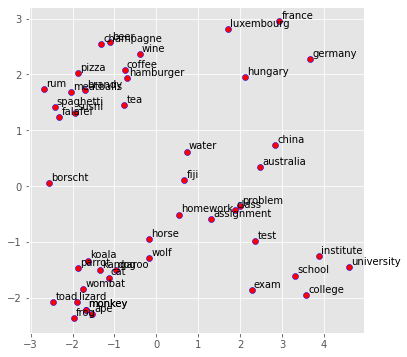

<IPython.core.display.Javascript object>

In [33]:
generate_visualisation(model=w2v_glove_vectors,
                        words=['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

### Visualise randomly sampled words

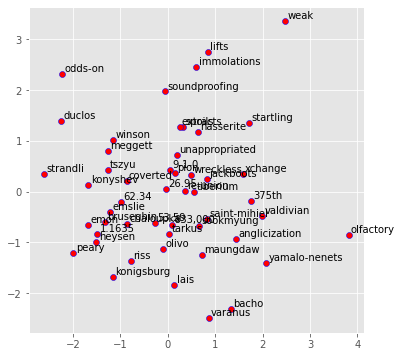

<IPython.core.display.Javascript object>

In [34]:
generate_visualisation(model=w2v_glove_vectors, sample_size=50)